# **importing libraries**

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import moment
import statistics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [ ]:
from lazypredict.Supervised import LazyClassifier

# **data exploration**

In [ ]:
uploaded = files.upload() #first we import dataset

Saving Stars.csv to Stars.csv


In [ ]:
stars = pd.read_csv(io.BytesIO(uploaded['Stars.csv']))

now we explore the dataset and its main information

In [ ]:
stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.00,0.17,16.12,Red,M,0
1,3042,0.00,0.15,16.60,Red,M,0
2,2600,0.00,0.10,18.70,Red,M,0
3,2800,0.00,0.16,16.65,Red,M,0
4,1939,0.00,0.10,20.06,Red,M,0


In [ ]:
stars.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
235,38940,374830.00,1356.00,-9.93,Blue,O,5
236,30839,834042.00,1194.00,-10.63,Blue,O,5
237,8829,537493.00,1423.00,-10.73,White,A,5
238,9235,404940.00,1112.00,-11.23,White,A,5
239,37882,294903.00,1783.00,-7.80,Blue,O,5


In [ ]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
stars.isnull().values.any() #checking for null values

False

In [ ]:
stars.shape

(240, 7)

In [ ]:
stars.duplicated().sum()

0

In [ ]:
stars.describe()

,Temperature,L,R,A_M,Type
count,240.00,240.00,240.00,240.00,240.00
mean,10497.46,107188.36,237.16,4.38,2.50
std,9552.43,179432.24,517.16,10.53,1.71
min,1939.00,0.00,0.01,-11.92,0.00
25%,3344.25,0.00,0.10,-6.23,1.00
50%,5776.00,0.07,0.76,8.31,2.50
75%,15055.50,198050.00,42.75,13.70,4.00
max,40000.00,849420.00,1948.50,20.06,5.00


# **correlation plot**

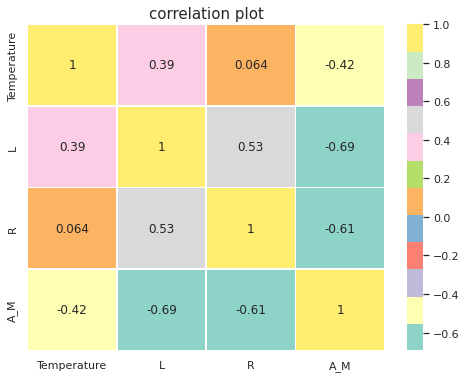

In [ ]:
plt.figure(figsize=(8,6))
sns.set_theme()
features = ["Temperature","L","R","A_M"]
correlation = stars[features].corr()
plt.title('correlation plot',size=15)
sns.heatmap(correlation, annot = True, linewidths=.5,cmap='Set3')

according to the correlation plot:
*   absolute magnitude is anti-correlated with other quantitive features.
*   radius and temperature are approximately uncorrelated.
*   luminosity is correlated with temperature and radius.






# **Pair Plots**

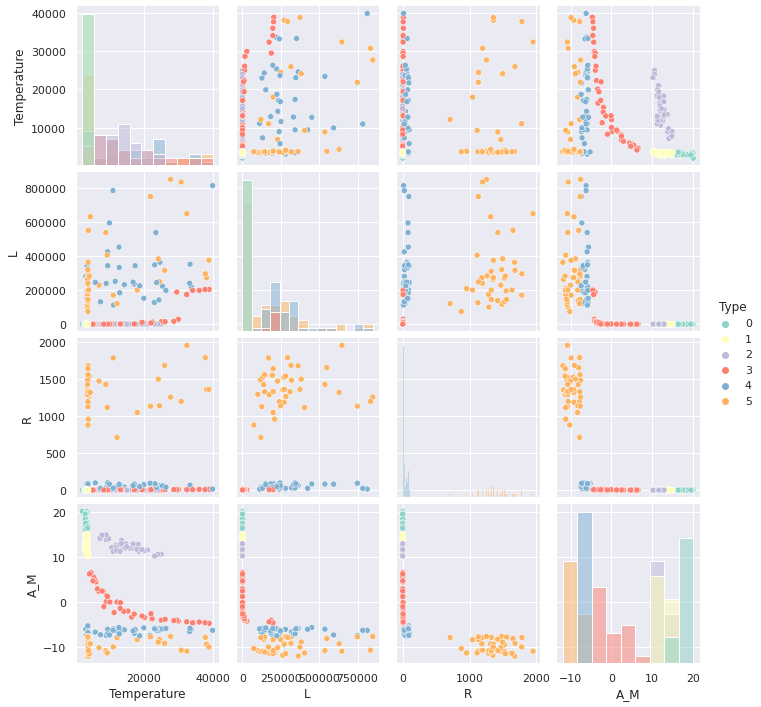

In [ ]:
# histogram pair plot
sns.pairplot(data=stars,hue='Type',diag_kind="hist",palette='Set3')

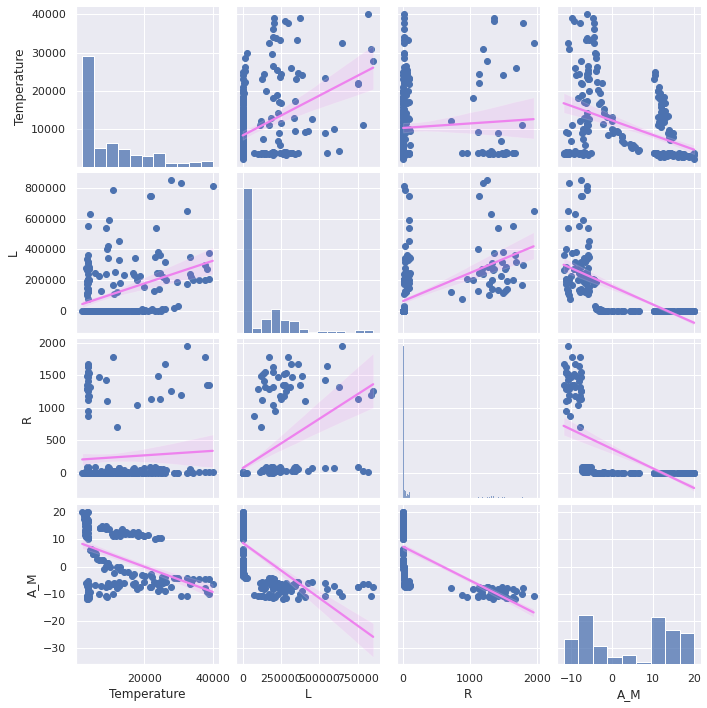

In [ ]:
# regression pair plot
sns.pairplot(stars[features],kind='reg',palette='Set3',plot_kws={'line_kws':{'color':'violet'},'scatter_kws': {'alpha':1}})
plt.show()

## 3-Dimensional scatter plot

In [ ]:
fig = px.scatter_3d(stars, x=stars['Type'], y=stars['A_M'], z=stars['Spectral_Class'],color='Temperature',template='plotly', title = 'Distribution of Star type and Spectral Class with their Magnitudes')
fig.show()

In [ ]:
fig = px.scatter_3d(stars, x=stars['Type'], y=stars['R'], z=stars['Spectral_Class'],color='Temperature', title = 'Distribution of Star type and Spectral Class with their Raduius')
fig.show()

In [ ]:
fig = px.scatter_3d(stars, x=stars['Type'], y=stars['L'], z=stars['Spectral_Class'],color='Temperature', title = 'Distribution of Star type and Spectral Class with their luminosity')
fig.show()

# **Count plots**

counting the number of stars based on qualitative quantities

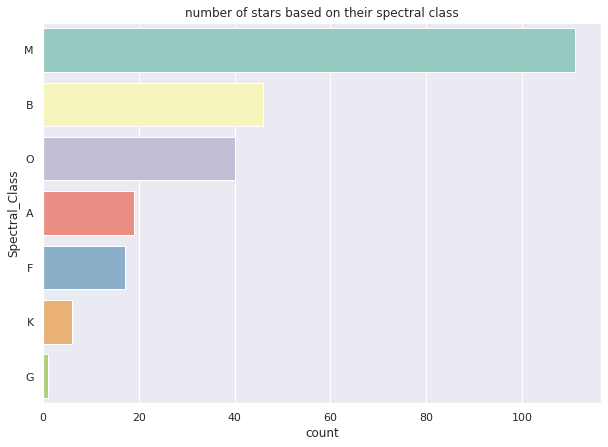

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y=stars['Spectral_Class'] , data=stars, palette='Set3', order=stars['Spectral_Class'].value_counts().index)
plt.title('number of stars based on their spectral class')
plt.show()

most of the stars are in spectral class 'M' and just few of them are in spectral class 'G'.

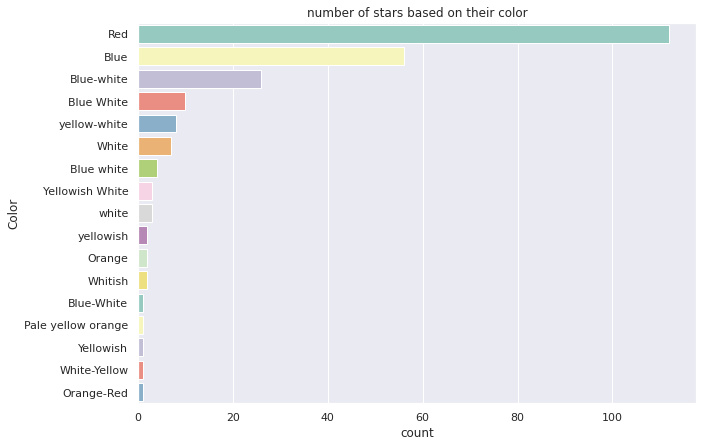

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y=stars['Color'] , data=stars, palette='Set3',order = stars['Color'].value_counts().index)
plt.title('number of stars based on their color')
plt.show()

# **Bar plots, count plots and pie chart**

## Spectral classes versus other features






P.S: We have used pie charts for those features that hadn't been represented clearly by Bar plots.

In [ ]:
group_L = stars.groupby('Spectral_Class')['L'].median().sort_values(ascending=False).to_frame()
group_L

,L
Spectral_Class,
O,245865.00
G,229000.00
A,38.00
K,0.49
B,0.03
M,0.00
F,0.00


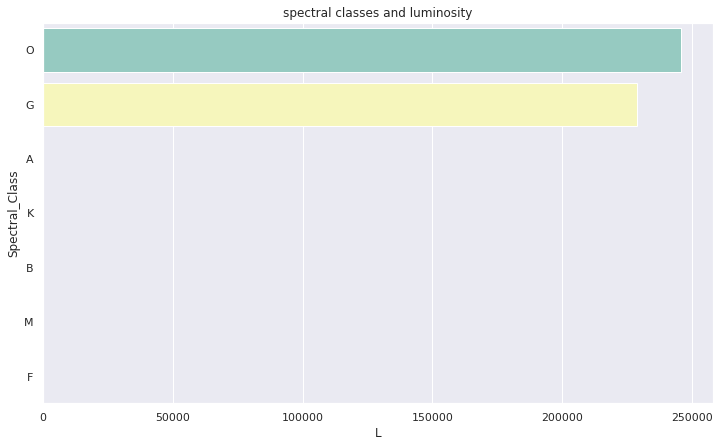

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('L', group_L.index ,data = group_L, palette='Set3')
plt.title('spectral classes and luminosity')
plt.show()

In [ ]:
fig = px.pie(stars, names='Spectral_Class', values='L', title = "Spectral Class and Luminosity",hole=0.2,opacity=0.5)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [ ]:
group_R = stars.groupby('Spectral_Class')['R'].median().sort_values(ascending=False).to_frame()
group_R

,R
Spectral_Class,
G,1467.00
O,57.00
A,2.49
K,1.00
M,0.29
B,0.01
F,0.01


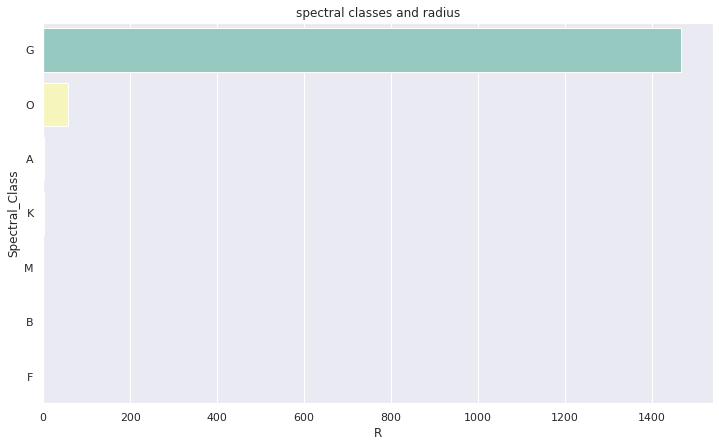

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('R', group_R.index ,data = group_R, palette='Set3')
plt.title('spectral classes and radius')
plt.show()

In [ ]:
fig = px.pie(stars, names='Spectral_Class', values='R', title = "Spectral Class and radius",hole=0.2,opacity=0.5)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [ ]:
group_A = stars.groupby('Spectral_Class')['A_M'].median().sort_values(ascending=False).to_frame()
group_A

,A_M
Spectral_Class,
M,13.12
F,12.02
B,10.37
K,4.73
A,1.24
O,-6.24
G,-10.07


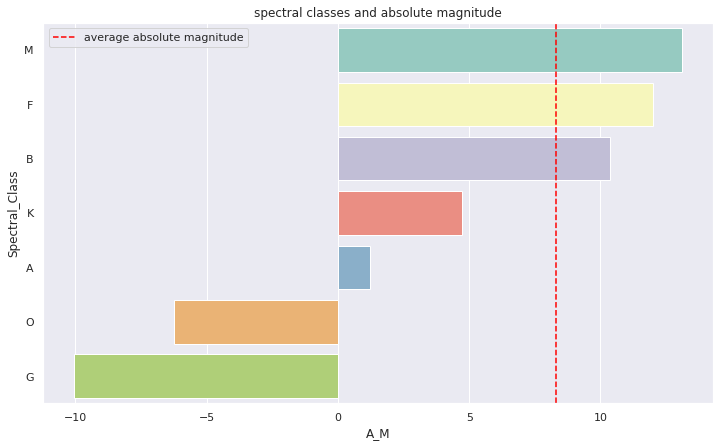

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('A_M', group_A.index ,data = group_A, palette='Set3')
plt.axvline(stars['A_M'].median(), linestyle='dashed', color = 'red', label = 'average absolute magnitude')
plt.legend(loc = 'upper left')
plt.title('spectral classes and absolute magnitude')
plt.show()

In [ ]:
group_T = stars.groupby('Spectral_Class')['Temperature'].median().sort_values(ascending=False).to_frame()
group_T

,Temperature
Spectral_Class,
O,22369.00
B,18850.00
A,9030.00
F,7230.00
G,6850.00
K,4406.50
M,3324.00


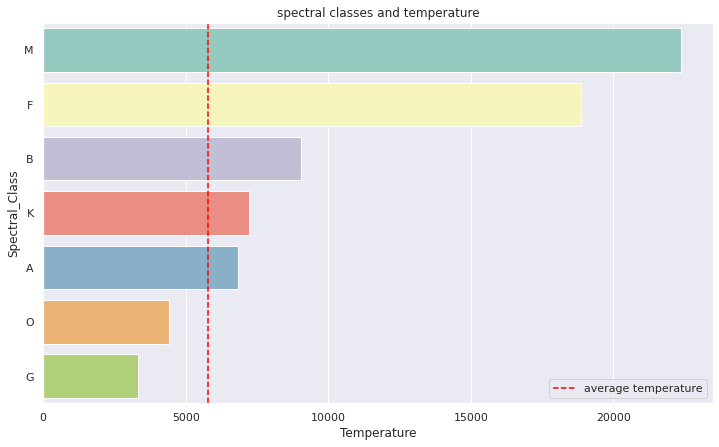

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('Temperature', group_A.index ,data = group_T, palette='Set3')
plt.axvline(stars['Temperature'].median(), linestyle='dashed', color = 'red', label = 'average temperature')
plt.legend(loc = 'lower right')
plt.title('spectral classes and temperature')
plt.show()

## color versus other features

In [ ]:
group_tt = stars.groupby('Color')['Temperature'].median().sort_values(ascending=False).to_frame()
group_tt

,Temperature
Color,
Blue,19921.50
Blue-white,18270.00
Blue White,13760.00
white,13720.00
Yellowish White,11790.00
Blue white,10412.00
Blue-White,8945.00
Whitish,8876.00
White,8500.00


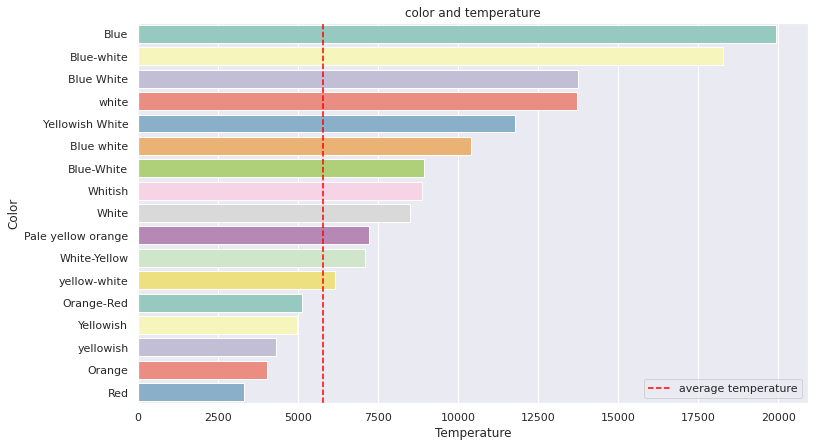

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('Temperature', group_tt.index ,data = group_tt, palette='Set3')
plt.axvline(stars['Temperature'].median(), linestyle='dashed', color = 'red', label = 'average temperature')
plt.legend(loc = 'lower right')
plt.title('color and temperature')
plt.show()

In [ ]:
group_am = stars.groupby('Color')['A_M'].median().sort_values(ascending=False).to_frame()
group_am

,A_M
Color,
White-Yellow,14.09
Pale yellow orange,14.08
White,14.02
Blue white,13.52
Red,13.09
white,12.97
Yellowish White,12.59
Blue White,12.03
yellowish,6.37


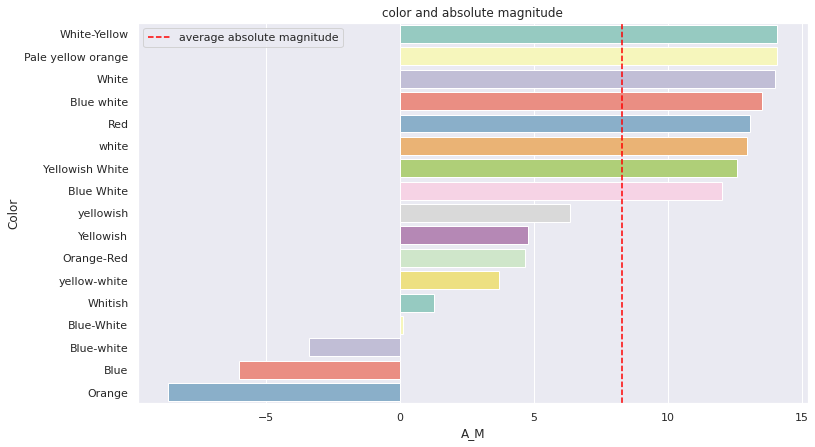

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('A_M', group_am.index ,data = group_am, palette='Set3')
plt.axvline(stars['A_M'].median(), linestyle='dashed', color = 'red', label = 'average absolute magnitude')
plt.legend(loc = 'upper left')
plt.title('color and absolute magnitude')
plt.show()

In [ ]:
group_rr = stars.groupby('Color')['R'].median().sort_values(ascending=False).to_frame()
group_rr

,R
Color,
Orange,1481.50
Blue,35.50
Blue-white,6.33
Blue-White,2.49
Whitish,2.35
Yellowish,1.13
yellow-white,1.05
Orange-Red,0.88
yellowish,0.83


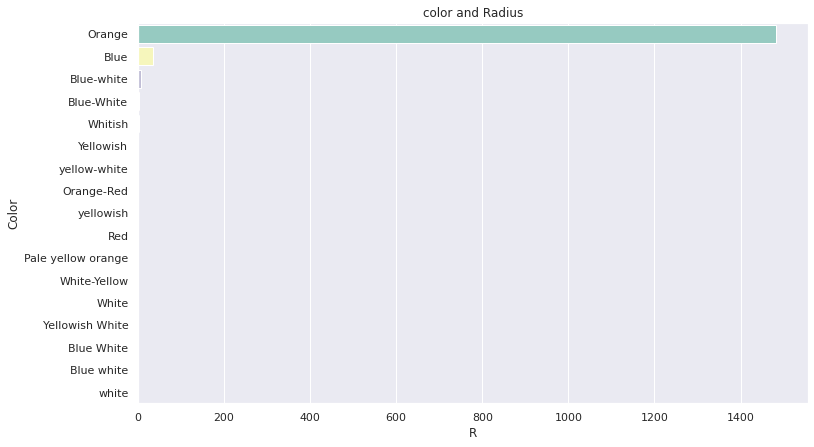

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('R', group_rr.index ,data = group_rr, palette='Set3')
plt.title('color and Radius')
plt.show()

In [ ]:
fig = px.pie(stars, names='Color', values='R', title = "Color and radius",hole=0.2,opacity=0.5)
fig.update_traces(textposition='outside', textinfo='label')
fig.show()

In [ ]:
group_ll = stars.groupby('Color')['L'].median().sort_values(ascending=False).to_frame()
group_ll

,L
Color,
Orange,590000.00
Blue,223890.00
Blue-white,8834.00
Whitish,41.35
Blue-White,38.00
yellow-white,1.35
Orange-Red,0.63
Yellowish,0.36
yellowish,0.12


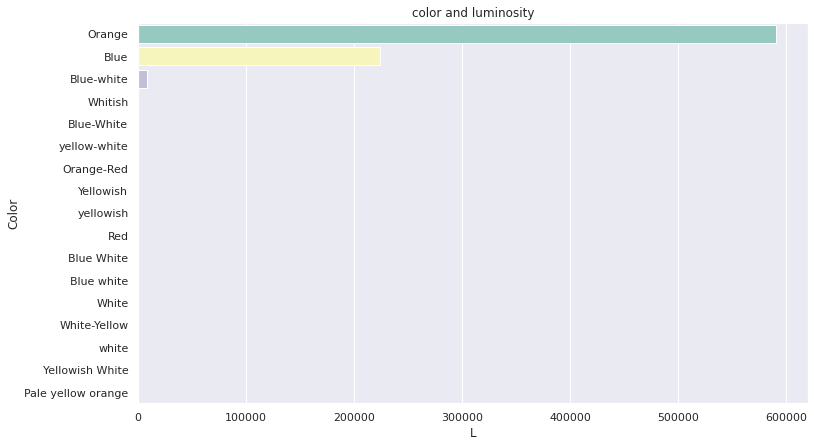

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('L', group_ll.index ,data = group_ll, palette='Set3')
plt.title('color and luminosity')
plt.show()

In [ ]:
fig = px.pie(stars, names='Color', values='L', title = "Color and Luminosity",hole=0.2,opacity=0.5)
fig.update_traces(textposition='outside', textinfo='label')
fig.show()

# **histograms**

in this part we used plotly.express library to plot each feature based on the other features.
We did the same for the color and the Spectral class (but with a different method). Therefore, we will not repeat them in this section.

### Type vs other features

In [ ]:
for i in ['L','R','Color','A_M','Temperature']:
  fig = px.histogram(stars, x=i, y="Type",color='Type',opacity=0.5)
  fig.show()

### Absolute magnitude vs other features

In [ ]:
for i in ['L','R','Color','Type','Spectral_Class','Temperature']:
  fig = px.histogram(stars, y='A_M', x=i,opacity=0.5)
  fig.show()

## radius vs other features

In [ ]:
for i in ['L','A_M','Color','Type','Spectral_Class','Temperature']:
  fig = px.histogram(stars, y='R', x=i,opacity=0.5)
  fig.show()

## Luminosity vs other features

In [ ]:
for i in ['R','A_M','Color','Type','Spectral_Class','Temperature']:
  fig = px.histogram(stars, y='L', x=i,opacity=0.5)
  fig.show()

## Temperature vs other features

In [ ]:
for i in ['R','A_M','Color','Type','Spectral_Class','L']:
  fig = px.histogram(stars, y='Temperature', x=i,opacity=0.5)
  fig.show()

# **Density plots**

in this part, we use two kind of plots(boxplot and distplot) in order to plot the PDF of the quantitative features.

In [ ]:
def pdf(data, title):
    fig, ax= plt.subplots(1,2, figsize=(16,8))
    fig.suptitle(title)
    sns.distplot(data, ax=ax[0], hist_kws={"color": "mediumturquoise"},kde_kws={"linewidth": 3.5,"alpha": 1, "color": "dimgrey"})
    sns.boxplot(y=data, ax=ax[1],palette='Set3');


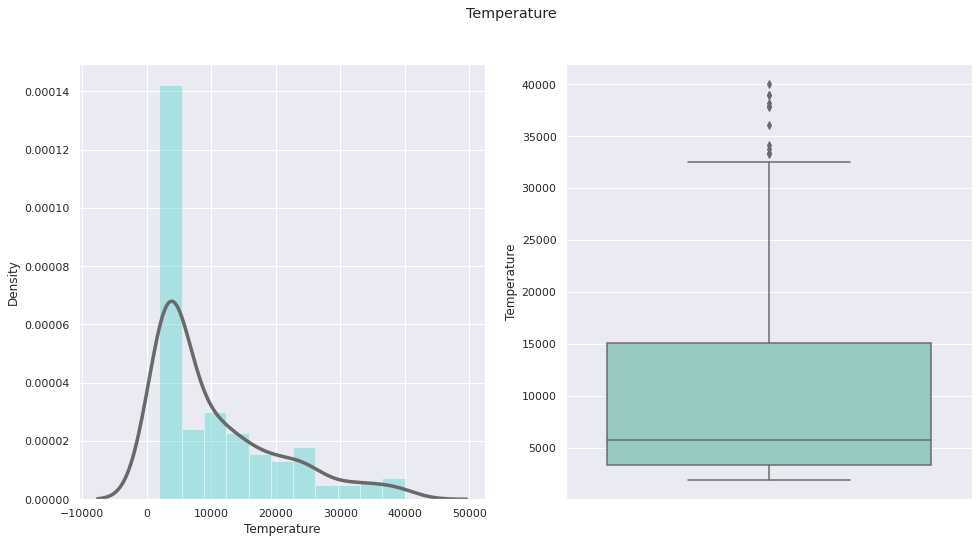

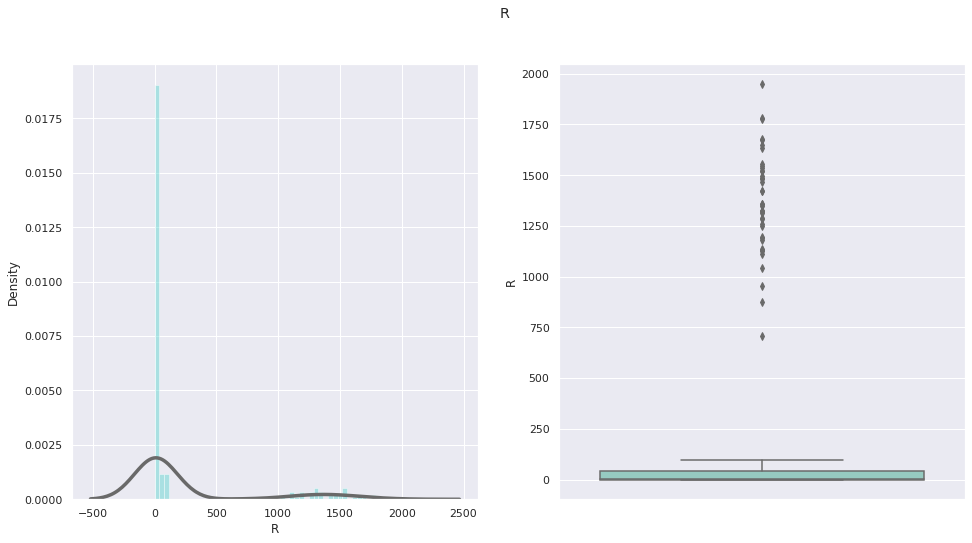

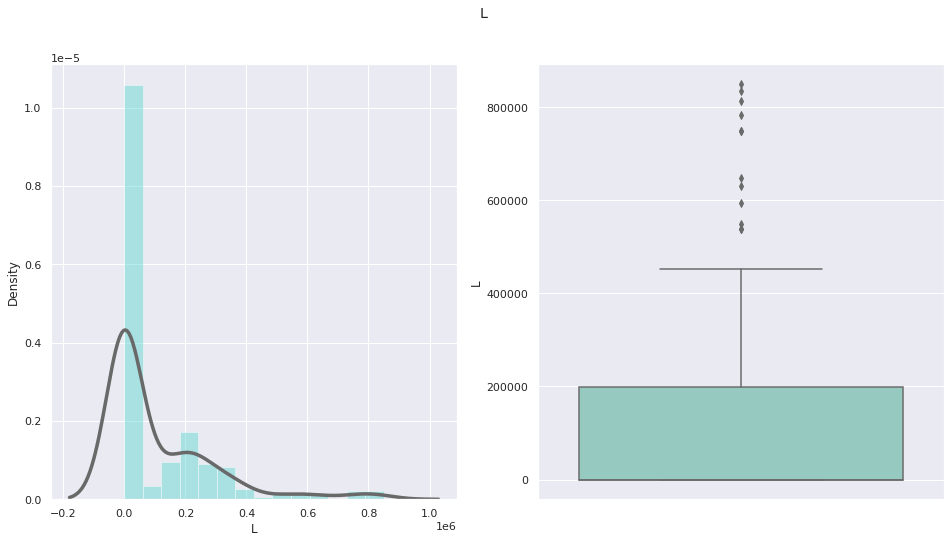

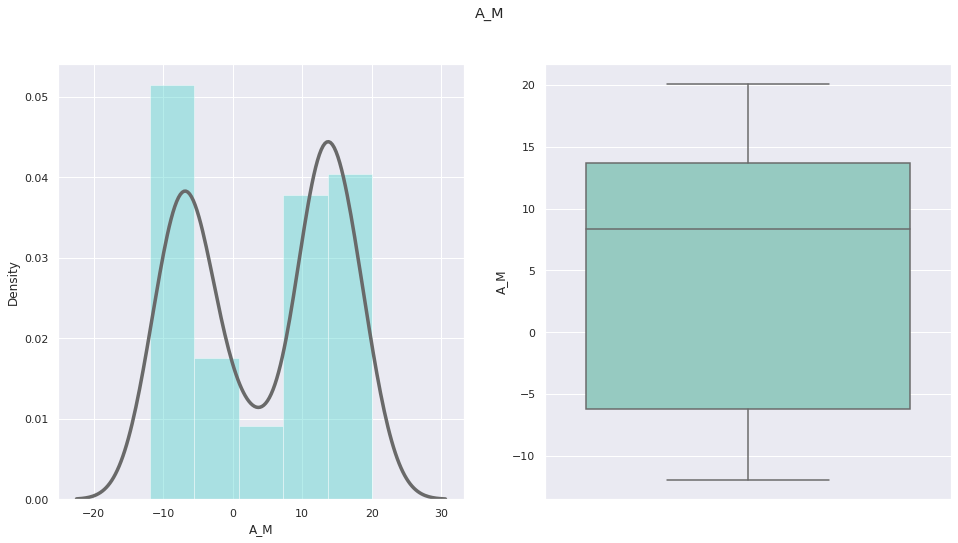

In [ ]:
for i in ['Temperature','R','L','A_M']:
  pdf(stars[i],i)


# **statistical features**

In [ ]:
numeric_data = stars.select_dtypes(include=[np.number])
numeric_data.head(3)

,Temperature,L,R,A_M,Type
0,3068,0.00,0.17,16.12,0
1,3042,0.00,0.15,16.60,0
2,2600,0.00,0.10,18.70,0


In [ ]:
def stat_features(i):
     min = np.min(numeric_data[i])
     print('minimum = {}'.format(min))
     max = np.max(numeric_data[i])
     print('maximum = {}'.format(max))
     mean = numeric_data[i].mean()
     print('average = {}'.format(mean))
     median = numeric_data[i].median()
     print('median = {}'.format(median))
     std = numeric_data[i].std()
     print('standard deviation = {}'.format(std))
     var = statistics.variance(numeric_data[i])
     print('variance = {}'.format(var))
     skw = moment(numeric_data[i], moment=3)
     print('skewness = {}'.format(skw))
     kur = moment(numeric_data[i], moment=4)
     print('kurtosis = {}'.format(kur))
     range = max-min
     print('range of data = {}'.format(range))
     cv = std / mean
     print('coefficient of variation = {}'.format(cv))


In [ ]:
# statistical features of Temperature
stat_features('Temperature')

minimum = 1939
maximum = 40000
average = 10497.4625
median = 5776.0
standard deviation = 9552.425037164023
variance = 91248824.09063807
skewness = 1137582536689.9019
kurtosis = 3.1660090921281068e+16
range of data = 38061
coefficient of variation = 0.9099746759908904


In [ ]:
# statistical features of Radius
stat_features('R')

minimum = 0.0084
maximum = 1948.5
average = 237.157781375
median = 0.7625
standard deviation = 517.1557634028478
variance = 267450.08362078236
skewness = 265911984.72030845
kurtosis = 355035552303.34375
range of data = 1948.4916
coefficient of variation = 2.180640080221984


In [ ]:
# statistical features of Luminosity
stat_features('L')

minimum = 8e-05
maximum = 849420.0
average = 107188.36163460833
median = 0.07050000000000001
standard deviation = 179432.2449402145
variance = 32195930524.28513
skewness = 1.1798284008636174e+16
kurtosis = 7.553145820747831e+21
range of data = 849419.99992
coefficient of variation = 1.67398999484549


In [ ]:
# statistical features of Absolute magnitude
stat_features('A_M')

minimum = -11.92
maximum = 20.06
average = 4.382395833333334
median = 8.312999999999999
standard deviation = 10.53251235061617
variance = 110.93381641588215
skewness = -140.23811477405602
kurtosis = 16518.23516793717
range of data = 31.979999999999997
coefficient of variation = 2.4033685571038297


# **H-R diagram of stars**

we can assign a name to the each type of stars :

1.   0 -> Brown Dwarf
2.   1 -> Red Dwarf
3.   2 -> white Dwarf
4.   3 -> Main-sequence
5.   4 -> Supergiant
6.   5 -> Hypergiant



In [ ]:
brown_dwarf = len(stars.loc[stars['Type'] == 0])
red_dwarf = len(stars.loc[stars['Type'] == 1])
white_dwarf = len(stars.loc[stars['Type'] == 2])
main_sequence = len(stars.loc[stars['Type'] == 3])
supergiant = len(stars.loc[stars['Type'] == 4])
hypergiant = len(stars.loc[stars['Type'] == 5])

print("Number of Brown Dwarfs = {} ".format(brown_dwarf))
print("Number of Red Dwarfs  = {} ".format(red_dwarf))
print('Number of White Dwarf = {} '.format(white_dwarf))
print("Number of Main Sequence = {} ".format(main_sequence))
print("Number of Supergiant= {} ".format(supergiant))
print("Number of Hypergiant = {} ".format(hypergiant))
print("Number of Total stars in the dataset = {} ".format(len(stars)))

Number of Brown Dwarfs = 40 
Number of Red Dwarfs  = 40 
Number of White Dwarf = 40 
Number of Main Sequence = 40 
Number of Supergiant= 40 
Number of Hypergiant = 40 
Number of Total stars in the dataset = 240 


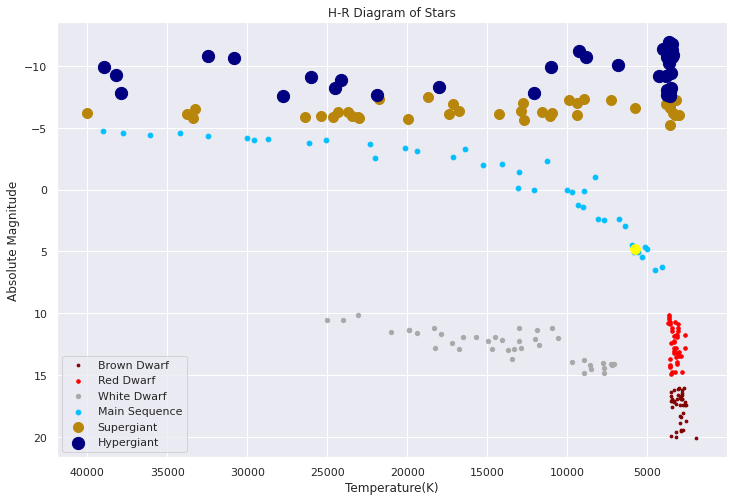

In [ ]:
x = np.array(stars.drop(['Color','Spectral_Class'],1))  #construct an array in shape (240,5), 5 features for each star among 240 stars
# x : temperature, L, R, A_M, Type
y = np.array(stars['Type'], dtype ='float')  #construct an array in shape pf(240,y), 1 type for each star among 240 stars
y.shape = (len(y),1)
count = 0


# x[i][4] : type of star in each row
# x[i][0] : temperature of star in each row
# x[i][3] : absolute magnitude of star in each row
plt.figure(figsize=(12,8))

for i in range(0,len(x)):
    if x[i][4] == 0:  #brown dwarf
        a = plt.scatter(x[i][0],x[i][3],s = 30 , c = 'maroon', marker = '.')
    elif x[i][4]== 1:  #red dwarf
        b = plt.scatter(x[i][0],x[i][3],s = 50 , c = 'red',marker = '.')
    elif x[i][4]== 2:  #white dwarf
        c = plt.scatter(x[i][0],x[i][3],s = 75 , c = 'darkgray',marker = '.')
    elif x[i][4]== 3:   #main sequence
        d = plt.scatter(x[i][0],x[i][3],s = 90 , c = 'deepskyblue',marker = '.')
    elif x[i][4]== 4:   #supergiants
        e = plt.scatter(x[i][0],x[i][3],s = 100 , c = 'darkgoldenrod',marker = 'o')
    elif x[i][4]== 5:   #hypergiants
        f = plt.scatter(x[i][0],x[i][3],s = 150 , c = 'navy',marker = 'o')


    count += 1


plt.scatter(5778,4.83,s = 95, c= 'yellow',marker = 'o')  #position of the sun in diagram according to its L & A_M
plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude")
plt.title("H-R Diagram of Stars")
plt.legend((a,b,c,d,e,f),('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

# **ML Tools**

##**lazy predict**

In [ ]:
x = stars.drop("Type",axis=1)
y = stars["Type"]

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x = stars.drop("Type",axis=1)
y = stars["Type"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
lib = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lib.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 16.61it/s]


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,None,1.00,0.18
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.04
ExtraTreesClassifier,1.00,1.00,None,1.00,0.14
GaussianNB,1.00,1.00,None,1.00,0.03
LabelSpreading,0.98,0.98,None,0.98,0.04
KNeighborsClassifier,0.98,0.98,None,0.98,0.03
LabelPropagation,0.98,0.98,None,0.98,0.04
LinearSVC,0.98,0.98,None,0.98,0.07
LogisticRegression,0.98,0.98,None,0.98,0.08


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,None,1.00,0.18
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.04
ExtraTreesClassifier,1.00,1.00,None,1.00,0.14
GaussianNB,1.00,1.00,None,1.00,0.03
LabelSpreading,0.98,0.98,None,0.98,0.04
KNeighborsClassifier,0.98,0.98,None,0.98,0.03
LabelPropagation,0.98,0.98,None,0.98,0.04
LinearSVC,0.98,0.98,None,0.98,0.07
LogisticRegression,0.98,0.98,None,0.98,0.08


according to these results, random forest classifier, Linear Discriminant Analysis, Extra Trees Classifier, and GaussianNB are the best methods for predicting the stars' types. but we should take into account that this dataset contains information about only 240 stars. so in more extensive datasets, this result might change.

In [ ]:
group_ac = models.groupby('Model')['Accuracy'].median().sort_values(ascending=False).to_frame()


,Accuracy
Model,
LinearDiscriminantAnalysis,1.00
RandomForestClassifier,1.00
ExtraTreesClassifier,1.00
GaussianNB,1.00
LinearSVC,0.98
BaggingClassifier,0.98
DecisionTreeClassifier,0.98
ExtraTreeClassifier,0.98
KNeighborsClassifier,0.98


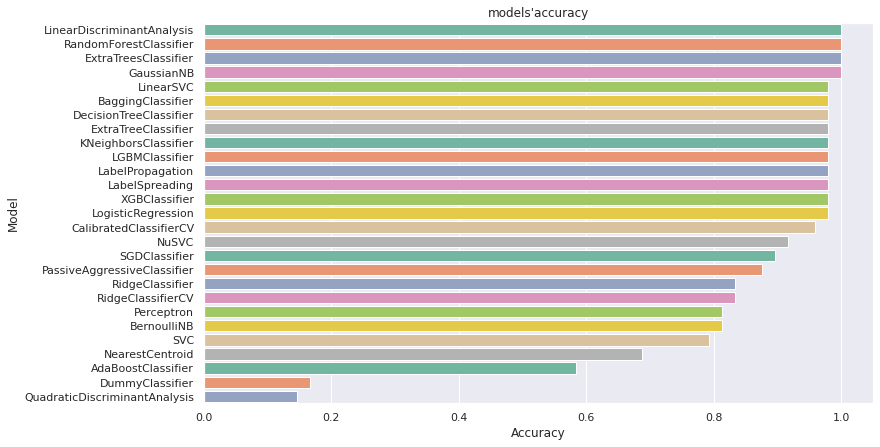

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.barplot('Accuracy', group_ac.index ,data = group_ac, palette='Set2')
plt.title("models'accuracy")
plt.show()

##**linear regression**

this kind of regression is used only for numerical columns.

In [ ]:
X = stars[['Temperature','L','R','A_M']]
Y = stars['Type']
x_train,x_test,y_train,y_test =  train_test_split(X,Y,test_size= 0.2,random_state = 50 )

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_
pd.DataFrame(model.coef_ , X.columns, columns=['Coefficients'])

,Coefficients
Temperature,0.00
L,-0.00
R,0.00
A_M,-0.14


In [ ]:
y_pred = model.predict(x_test)

MAE= metrics.mean_absolute_error(y_test, y_pred)
print('MAE =',MAE)
MSE=metrics.mean_squared_error(y_test, y_pred)
print('MSE =',MSE)
RMSE= np.sqrt(MSE)
print('RMSE =',RMSE)
variance_score = r2_score(y_test,y_pred)  #The closer to 1, the better the model.
print('variance_score =',variance_score)

MAE = 0.39030558153442035
MSE = 0.24614095189138677
RMSE = 0.4961259435782277
variance_score = 0.8736107080103064


## **Logistic regression**

### converting categorical features

In [ ]:
spectral = pd.get_dummies(stars['Spectral_Class'],drop_first=True)
color = pd.get_dummies(stars['Color'],drop_first = True)

In [ ]:
stars.drop(['Spectral_Class','Color'],axis=1,inplace=True)

In [ ]:
stars = pd.concat([stars,spectral,color],axis=1)
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         240 non-null    int64  
 1   L                   240 non-null    float64
 2   R                   240 non-null    float64
 3   A_M                 240 non-null    float64
 4   Type                240 non-null    int64  
 5   B                   240 non-null    uint8  
 6   F                   240 non-null    uint8  
 7   G                   240 non-null    uint8  
 8   K                   240 non-null    uint8  
 9   M                   240 non-null    uint8  
 10  O                   240 non-null    uint8  
 11  Blue White          240 non-null    uint8  
 12  Blue white          240 non-null    uint8  
 13  Blue-White          240 non-null    uint8  
 14  Blue-white          240 non-null    uint8  
 15  Orange              240 non-null    uint8  
 16  Orange-R

###import model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(stars.drop('Type',axis=1),stars['Type'],test_size = 0.25,random_state=50)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predict= logmodel.predict(x_test)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.29      1.00      0.44         6
           1       0.00      0.00      0.00        17
           2       0.77      1.00      0.87        10
           3       1.00      0.77      0.87        13
           4       0.73      0.89      0.80         9
           5       0.80      0.80      0.80         5

    accuracy                           0.63        60
   macro avg       0.60      0.74      0.63        60
weighted avg       0.55      0.63      0.56        60



## KMeans clustering

In [ ]:
kmeans = KMeans(n_clusters=6)

In [ ]:
kmeans.fit(stars.drop('Type',axis=1))

KMeans(n_clusters=6)

In [ ]:
kmeans.cluster_centers_

array([[ 1.53189730e+04,  2.26924865e+05,  5.23745135e+02,
        -7.46337838e+00,  1.08108108e-01,  1.38777878e-17,
         2.70270270e-02,  2.70270270e-02,  3.78378378e-01,
         4.59459459e-01, -2.08166817e-17, -6.93889390e-18,
        -1.73472348e-18,  5.40540541e-02, -3.46944695e-18,
        -1.73472348e-18, -1.73472348e-18,  4.32432432e-01,
         0.00000000e+00, -1.73472348e-18, -3.46944695e-18,
        -1.73472348e-18, -6.93889390e-18, -6.93889390e-18,
        -1.38777878e-17, -3.46944695e-18],
       [ 8.05279870e+03,  7.64907742e+02,  9.71821623e-01,
         1.11645584e+01,  2.33766234e-01,  1.10389610e-01,
         6.93889390e-18,  2.59740260e-02,  5.19480519e-01,
        -3.05311332e-16,  6.49350649e-02,  2.59740260e-02,
         6.49350649e-03,  1.23376623e-01,  1.38777878e-17,
         6.49350649e-03,  6.49350649e-03,  5.19480519e-01,
         3.24675325e-02,  6.49350649e-03,  1.29870130e-02,
         6.49350649e-03,  1.94805195e-02,  1.94805195e-02,
         5.19

In [ ]:
print(classification_report(stars['Type'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.26      1.00      0.41        40
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        40
           4       0.33      0.05      0.09        40
           5       0.58      0.28      0.37        40

    accuracy                           0.22       240
   macro avg       0.20      0.22      0.15       240
weighted avg       0.20      0.22      0.15       240

